- **Project**: UAS Pembelajaran Mesin
- **Created**: Sun, 18th Dec 2022 1:15:24 PM
- **Author**: F. Waskito
- **Reference**: Randerson. (July 12, 2019). *Classifiy Images Using Convolutional Neural Network & Python*. Medium.com. [link](https://randerson112358.medium.com/classify-images-using-convolutional-neural-networks-python-a89cecc8c679)

***

**Impor pustaka yang dibutuhkan**

In [ ]:
# Impor pustaka yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

***Outset***

In [ ]:
# Tensorflow flag (Log all messages except INFO and WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
# Current working directory
os.getcwd()

'/content'

***Load data***

In [ ]:
from keras.datasets import cifar10
# Dataset cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### **Analisis Data**

**Menampilkan tipe data dari sampel latih dan uji**

In [ ]:
print('X_train shape:', type(X_train))
print('y_train shape:', type(y_train))
print('X_test shape:', type(X_test))
print('y_test shape:', type(y_test))

X_train shape: <class 'numpy.ndarray'>
y_train shape: <class 'numpy.ndarray'>
X_test shape: <class 'numpy.ndarray'>
y_test shape: <class 'numpy.ndarray'>


**Menampilkan dimensi dari sampel latih dan uji**

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Menelusuri salah satu citra**

In [ ]:
index = 13
X_train[index]  # citra urutan ke-5 (indeks ke-4) pada sampel latih

array([[[ 17,   3,   2],
        [ 17,   3,   2],
        [ 17,   2,   1],
        ...,
        [ 23,  13,  11],
        [ 22,  12,  10],
        [ 19,   9,   7]],

       [[ 18,   4,   3],
        [ 18,   4,   3],
        [ 18,   4,   3],
        ...,
        [ 24,  14,  12],
        [ 23,  13,  11],
        [ 22,  12,  10]],

       [[ 18,   4,   3],
        [ 18,   4,   3],
        [ 19,   5,   4],
        ...,
        [ 24,  14,  12],
        [ 23,  13,  11],
        [ 23,  13,  11]],

       ...,

       [[217, 214, 223],
        [226, 219, 227],
        [210, 201, 213],
        ...,
        [ 33,  24,  17],
        [ 32,  23,  16],
        [ 33,  24,  17]],

       [[219, 215, 230],
        [222, 215, 229],
        [214, 208, 225],
        ...,
        [ 35,  26,  19],
        [ 34,  25,  18],
        [ 33,  24,  17]],

       [[210, 208, 223],
        [221, 216, 229],
        [215, 212, 227],
        ...,
        [ 36,  27,  20],
        [ 34,  25,  18],
        [ 32,  23,  16]]

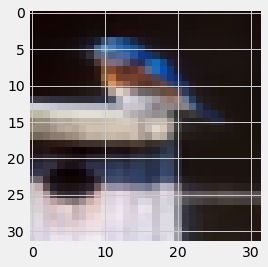

In [ ]:
# Menampilkan citra secara visual
img = plt.imshow(X_train[index])

In [ ]:
# Mengetahui default label (bertipe kategorik-numerik) dari citra
print('The image label is: ', y_train[index])

The image label is:  [2]


In [ ]:
# Buat representasi label (kategorik-string)
label_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

print('Number ', 'class')
print('-------------------------')
for i in range(len(label_classes)):
    print(str(i).ljust(7), str(label_classes[i]).ljust(5))

Number  class
-------------------------
0       airplane
1       automobile
2       bird 
3       cat  
4       deer 
5       dog  
6       frog 
7       horse
8       ship 
9       truck


In [ ]:
# Tampilkan label dari citra sebelumnya
print('The image class is: ', label_classes[y_train[index][0]])

The image class is:  bird


### **Praprosess**

***Label encoding* (dengan *one-hot encoding*)**

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Hasil encoding pada label sampel latih
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Hasil encoding pada label sampel uji
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# Hasil encoding dari label citra urutan pertama pada sampel latih
print('The one-hot label is: ', y_train_one_hot[0])

The one-hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Normalisasi Citra**

In [ ]:
# ubah nilai citra pada sampel latih dan uji 
# dari interval [0,255] menjadi ke [0,1]
X_train = X_train / 255
X_test = X_test / 255

X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### **Pemodelan**

**Bangun arsitektur *Convolutional Neural Network***




In [ ]:
model = Sequential()
# Convolutional and pooling layers
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Neural Network and dropout layers
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

print('Model summary:\n')
model.summary()

Model summary:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 10

**Kompilasi model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### **Pelatihan Model**

In [ ]:
hist = model.fit(X_train, 
                 y_train_one_hot,
                 batch_size=256, 
                 epochs=10, 
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 3s 14ms/step - loss: 1.7827 - accuracy: 0.3294 - val_loss: 1.4775 - val_accuracy: 0.4611
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.4225 - accuracy: 0.4789 - val_loss: 1.3400 - val_accuracy: 0.5101
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 1.2663 - accuracy: 0.5401 - val_loss: 1.2225 - val_accuracy: 0.5718
Epoch 4/10
157/157 [==============================] - 2s 13ms/step - loss: 1.1546 - accuracy: 0.5881 - val_loss: 1.1037 - val_accuracy: 0.6116
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 1.0426 - accuracy: 0.6273 - val_loss: 1.0610 - val_accuracy: 0.6313
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.9638 - accuracy: 0.6577 - val_loss: 1.0303 - val_accuracy: 0.6408
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8971 - accuracy: 0.6828 - val_loss: 0.9483 - val_accuracy: 0.6723

### **Evaluasi Model**

In [ ]:
# Evaluasi model tehadap sampel uji
accuracy = model.evaluate(X_test, y_test_one_hot)[1]

print('Accuracy score:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9711 - accuracy: 0.6728
Accuracy score: 0.6728000044822693


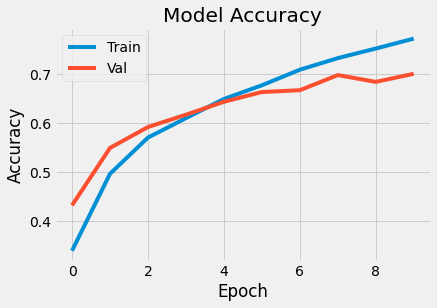

In [ ]:
# Memvisualisasikan akurasi dari hasil pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

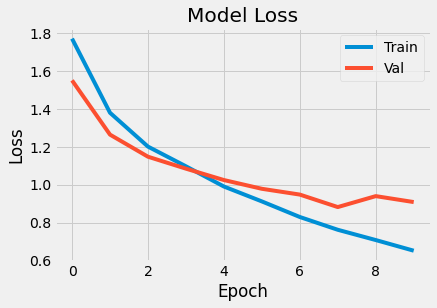

In [ ]:
# Memvisualisasikan kerugian (loss) dari hasil pelatihan
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### **Pengujian Model dengan Citra Unggahan**

**Unggah citra uji jika menggunakan Google Colab**

In [ ]:
from google.colab import files

uploaded = files.upload()
uploaded_file_name = list(uploaded.keys())[0]

print('\n> Isi current working directory:')
!ls

Saving dog_0006.jpg to dog_0006.jpg

> Isi current working directory:
dog_0000.jpg  dog_0006.jpg  sample_data


**Uaggah citra uji jika menggunakan IDE lokal**

In [ ]:
"""
import shutil
import tkinter as tk
from tkinter import filedialog as fd

def upload_file():
    root = tk.Tk()
    root.wm_withdraw()
    curr_directory = os.getcwd()
    source_path = fd.askopenfilename(initialdir=curr_directory, 
                                    title="Select Image", 
                                    filetypes=[('Image Files', '*.jpg')])
    root.destroy()  # Tutup root Tkinter dialog

    uploaded_file_name = os.path.basename(source_path)
    uploaded_path = os.path.join(curr_directory, uploaded_file_name)
    shutil.copyfile(source_path, uploaded_path)

    return uploaded_file_name

uploaded_file_name = upload_file()

# Tampilkan isi current working directory terbaru
print('\n> Isi "cwd":')
for file in os.listdir(os.getcwd()):
    print(file)
"""

'\nimport shutil\nimport tkinter as tk\nfrom tkinter import filedialog as fd\n\ndef upload_file():\n    root = tk.Tk()\n    root.wm_withdraw()\n    curr_directory = os.getcwd()\n    source_path = fd.askopenfilename(initialdir=curr_directory, \n                                    title="Select Image", \n                                    filetypes=[(\'Image Files\', \'*.jpg\')])\n    root.destroy()  # Tutup root Tkinter dialog\n\n    uploaded_file_name = os.path.basename(source_path)\n    uploaded_path = os.path.join(curr_directory, uploaded_file_name)\n    shutil.copyfile(source_path, uploaded_path)\n\n    return uploaded_file_name\n\nuploaded_file_name = upload_file()\n\n# Tampilkan isi current working directory terbaru\nprint(\'\n> Isi "cwd":\')\nfor file in os.listdir(os.getcwd()):\n    print(file)\n'

**Baca dan tampilkan citra uji unggahan**


Nama file citra unggahan: "dog_0006.jpg" 



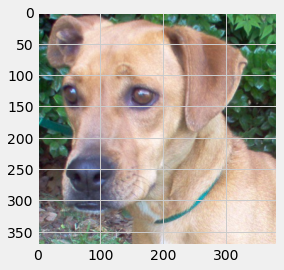

In [ ]:
print(f'\nNama file citra unggahan: "{uploaded_file_name}" \n')
# Membaca file unggahan
new_image = plt.imread(uploaded_file_name)

# Tampilkan citra unggahan secara visual
img = plt.imshow(new_image)

**Transformasi citra uji unggahan**

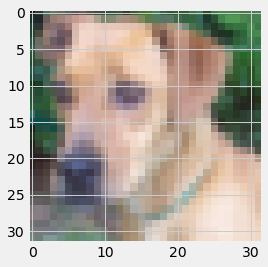

In [ ]:
from skimage.transform import resize
# Ubah ukuran citra sehingga sesuai dengan input layer pada model
resized_image = resize(new_image, (32, 32, 3))

img = plt.imshow(resized_image)

**Buat prediksi**

In [ ]:
predictions = model.predict(np.array([resized_image]))

1/1 [==============================] - 0s 19ms/step


**Hasil prediksi**

In [ ]:
predictions

array([[1.4761684e-05, 1.7199295e-06, 3.5978045e-04, 4.6784177e-02,
        3.7786382e-04, 9.5180041e-01, 9.5102536e-05, 5.5454043e-04,
        7.1347040e-06, 4.5270908e-06]], dtype=float32)

In [ ]:
# Urutkan probabilitas hasil prediksi yang berkesesuaian terhadap kelas
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[5, 3, 7, 4, 2, 6, 0, 8, 9, 1]


In [ ]:
# Tampilkan 5 kelas hasil prediksi dengan probabilitas tertinggi
for i in range(0, 5):
  print(label_classes[list_index[i]].ljust(10),':', 
        round(predictions[0][list_index[i]] * 100, 2),'%')

dog        : 95.18 %
cat        : 4.68 %
horse      : 0.06 %
deer       : 0.04 %
bird       : 0.04 %


### **Pengujian Model dengan Citra pada Sampel Uji Cifar10**

**1. Pengujian data tunggal**


The random index of the test image is: 2369
The actual class of the test image is: automobile 



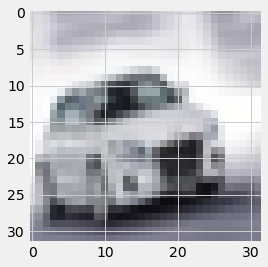

In [ ]:
import random
# Ambil citra uji secara acak
rand_test_index = random.randint(0, len(X_test))
rand_test_image = X_test[rand_test_index]
rand_test_class = label_classes[y_test[rand_test_index][0]]

print('\nThe random index of the test image is:', rand_test_index)
print('The actual class of the test image is:', rand_test_class, '\n')
img = plt.imshow(rand_test_image)

Buat prediksi

In [ ]:
rand_test_image = np.reshape(rand_test_image, (1, 32, 32, 3))

predictions = model.predict(rand_test_image)

1/1 [==============================] - 0s 16ms/step


Hasil prediksi

In [ ]:
predictions

array([[7.4032490e-05, 9.8865497e-01, 7.5540365e-06, 4.5795919e-06,
        9.1404672e-07, 2.6581170e-06, 7.5532657e-06, 4.2095397e-07,
        6.8714132e-04, 1.0560185e-02]], dtype=float32)

In [ ]:
# Urutkan probabilitas hasil prediksi dari terbesar ke terkecil
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[1, 9, 8, 0, 2, 6, 3, 5, 4, 7]


In [ ]:
# Tampilkan 5 kelas hasil prediksi dengan probabilitas tertinggi
for i in range(0, 5):
  print(label_classes[list_index[i]].ljust(10),':', 
        round(predictions[0][list_index[i]] * 100, 2),'%')

automobile : 98.87 %
truck      : 1.06 %
ship       : 0.07 %
airplane   : 0.01 %
bird       : 0.0 %


**2. Pengujian seluruh data uji**

Buat prediksi

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Hasil

In [ ]:
# Untuk setiap satu hasil prediksi, ambil label prediksi pada indeks
# berkesesuaian yang memiliki probabilitas tertinggi
y_predict = []
for probabilities in predictions:
  y_predict.append(np.argmax(probabilities))

In [ ]:
from sklearn import metrics as mr

print('Number of test images:', len(X_test))
print('\nConfusion matrix:\n', mr.confusion_matrix(y_test, y_predict))
print('\nClassification report:\n',
      mr.classification_report(y_test, y_predict))

Number of test images: 10000

Confusion matrix:
 [[751  32  43   6  17   9   8   7  97  30]
 [ 21 870   4   5   4   4   8   4  32  48]
 [ 82  13 516  46 149  86  37  33  29   9]
 [ 37  23  67 325 130 263  52  43  31  29]
 [ 42   9  56  25 728  38  14  65  20   3]
 [ 23   9  50  85  93 622  17  71  18  12]
 [  7  16  50  40 163  38 645  12  11  18]
 [ 23   7  27  15  90  62   4 747   6  19]
 [ 68  43  11   7   7  12   1   2 832  17]
 [ 44 157   8  10   4  10   7  17  51 692]]

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.72      1000
           1       0.74      0.87      0.80      1000
           2       0.62      0.52      0.56      1000
           3       0.58      0.33      0.42      1000
           4       0.53      0.73      0.61      1000
           5       0.54      0.62      0.58      1000
           6       0.81      0.65      0.72      1000
           7       0.75      0.75      0.75      1000
        

***

**Simpan Model**

In [ ]:
model.save('model/185314098_cnn_model.h5')

print('> Isi "cwd/model":')
for file in os.listdir(os.getcwd()+"/model"):
    print(file)

> Isi "cwd/model":
185314098_cnn_model.h5
